In [138]:
import pandas as pd #for reading the dataset
import numpy as np #for plotting
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [139]:
df = pd.read_csv("https://raw.githubusercontent.com/Jegadit/Customer-Churn-Prediction-Analysis-Using-Ensemble-Techniques/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [140]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
df.shape

(7043, 21)

In [142]:
df.duplicated().sum()

0

In [143]:
df = df.drop_duplicates(subset= None, keep= 'first', inplace= False, ignore_index= False)
df.duplicated().sum()

0

In [144]:
df.shape

(7043, 21)

In [145]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# FEATURE ENGINEERING

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [148]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

### ENCODING & DROPPING

In [149]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns.to_list()

label_encoder = LabelEncoder()
test = df['Churn']
df = df.drop(['Churn'], axis = 1)


for i in range(len(cols)-3):
    df[cols[i]] = label_encoder.fit_transform(df[cols[i]])

df['Churn'] = label_encoder.fit_transform(test)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [150]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [151]:
droplist = ['customerID','MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

df = df.drop(columns=droplist)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,2,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,2,0,53.85,108.15,1
3,1,0,0,0,45,0,0,2,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,0,2,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,2,0,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,0,0,0,74.40,306.60,1


In [152]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# DATA VISUALIZATION

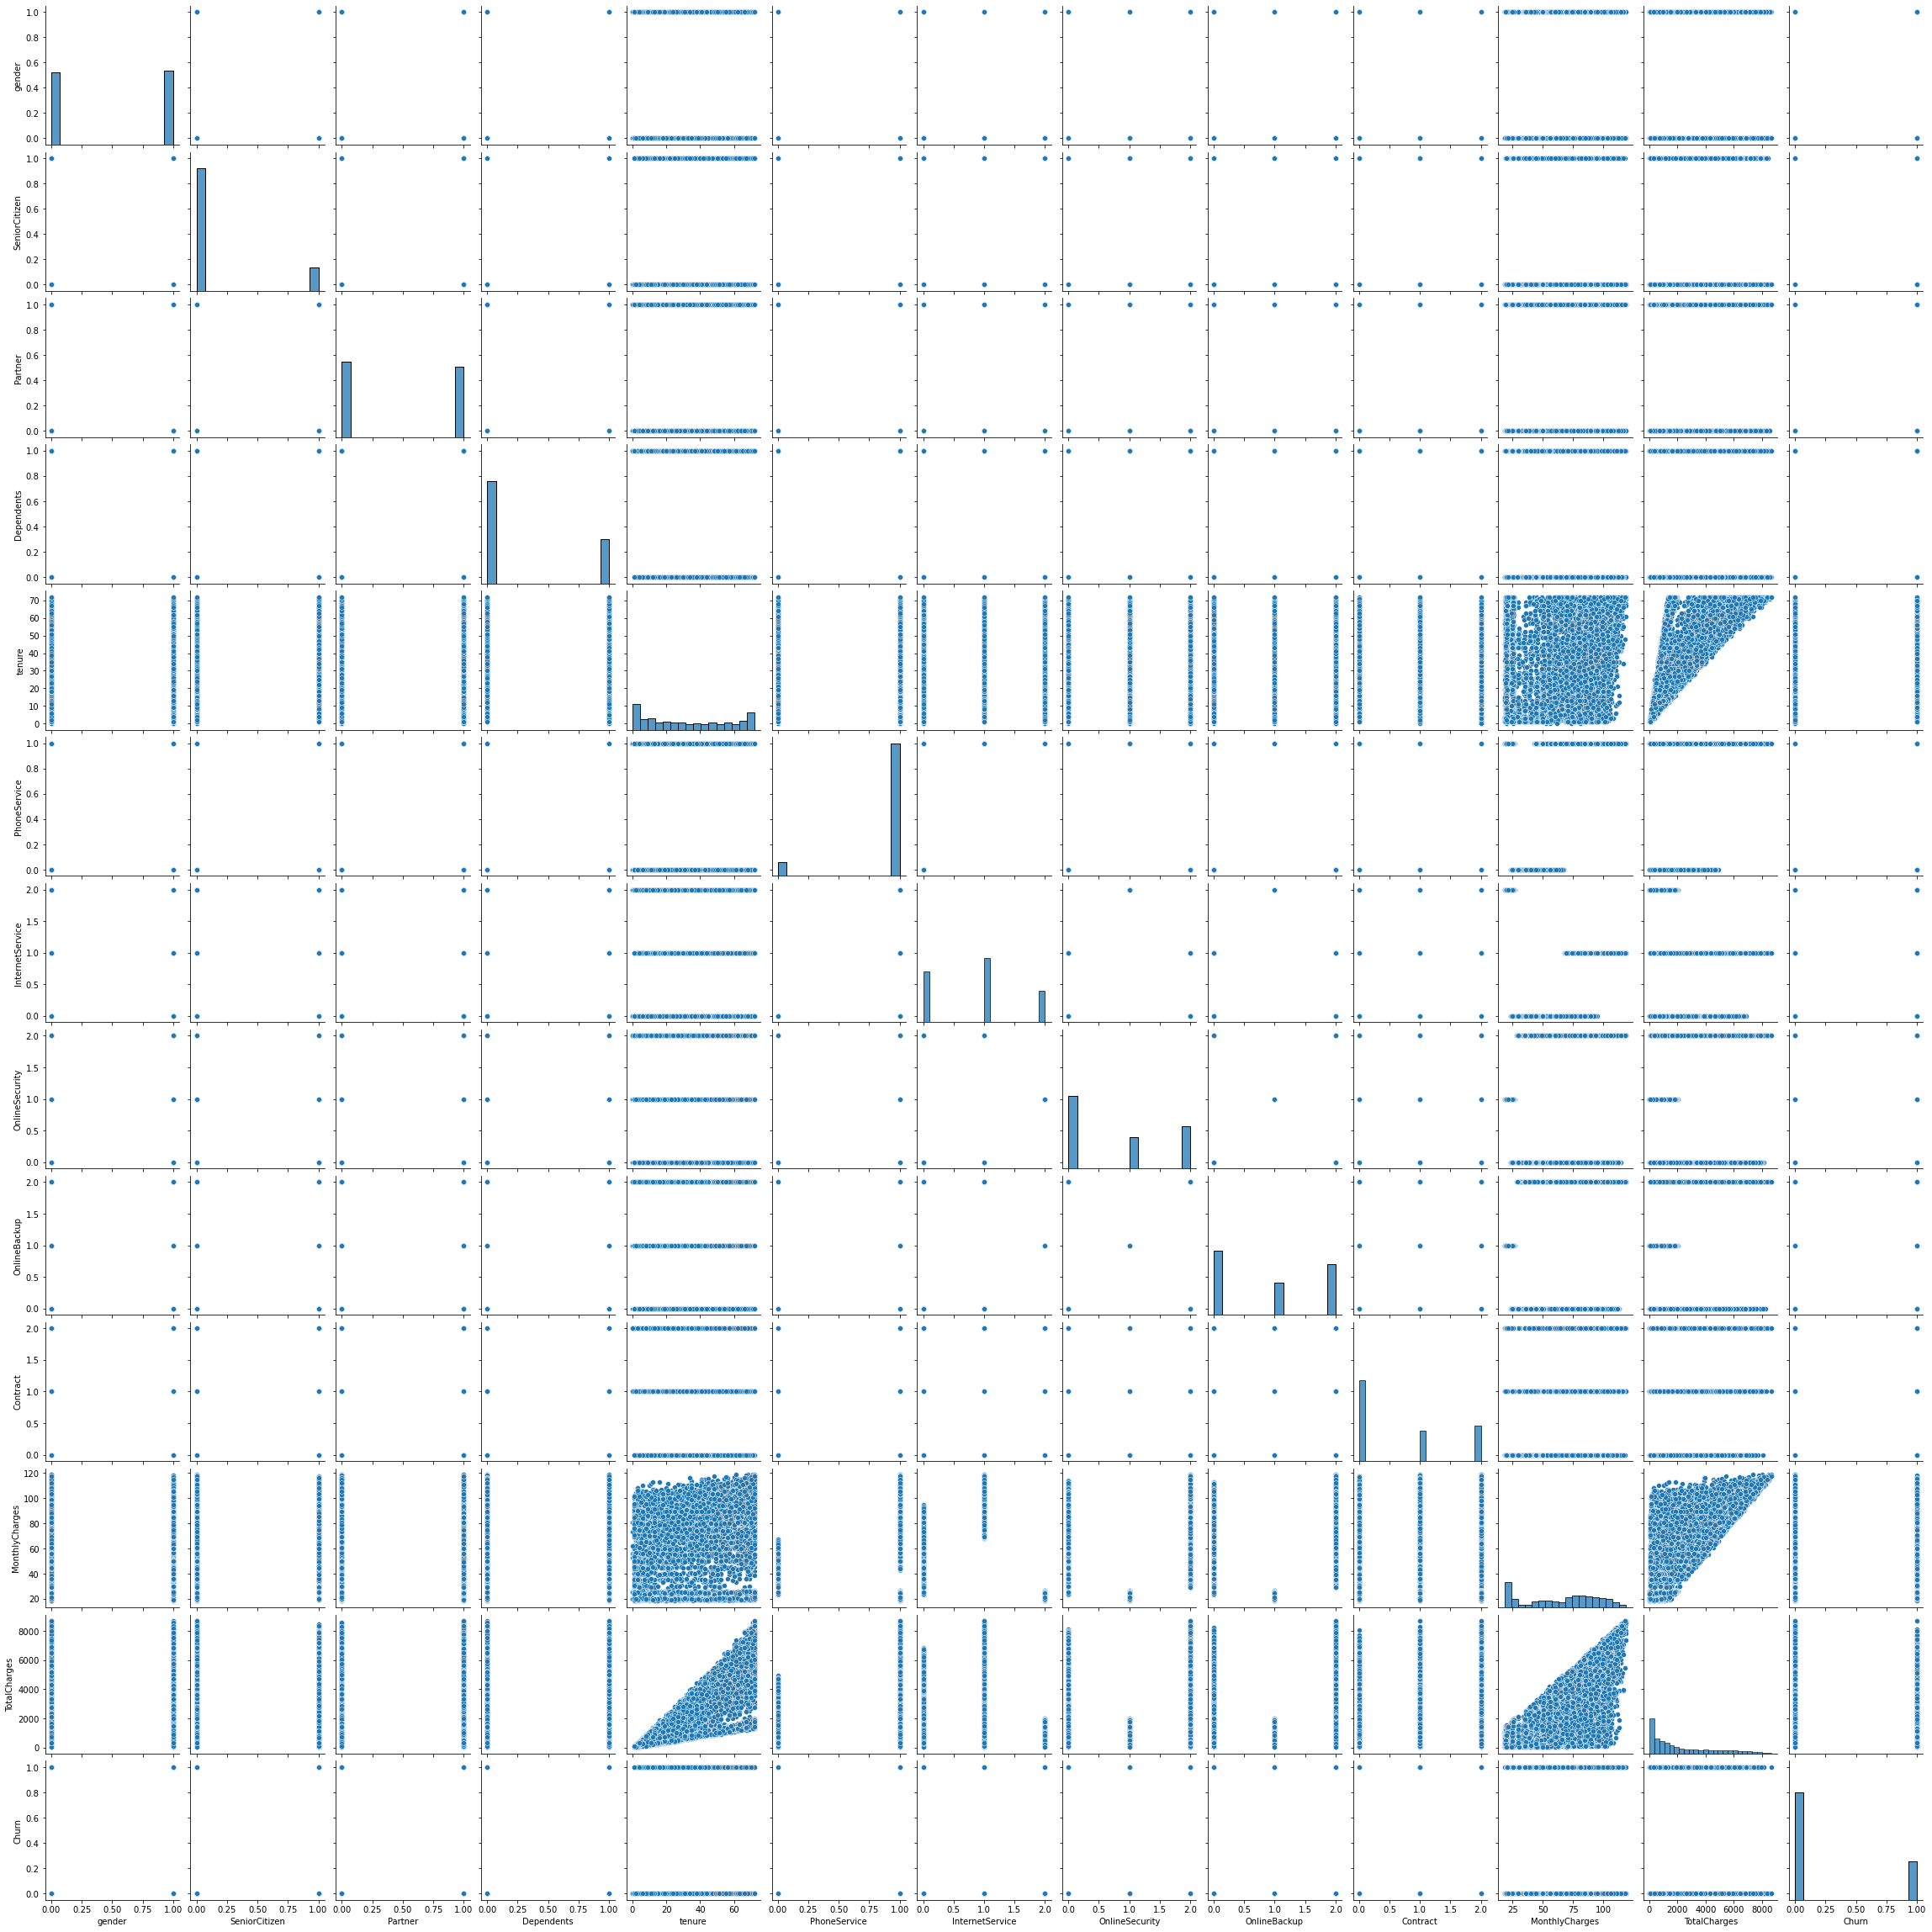

In [153]:
sns.pairplot(df)

In [154]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

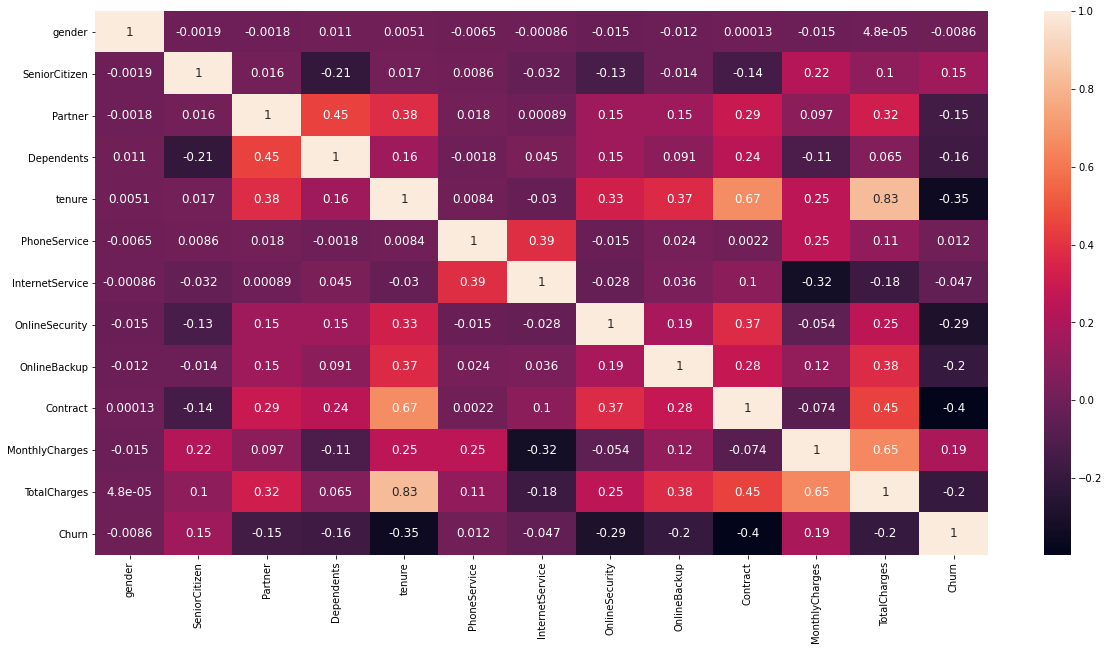

In [155]:
corr=df.corr()

plt.figure(figsize = (20,10))

sns.heatmap(corr, annot=True, annot_kws={'size': 12})

<AxesSubplot:xlabel='tenure'>

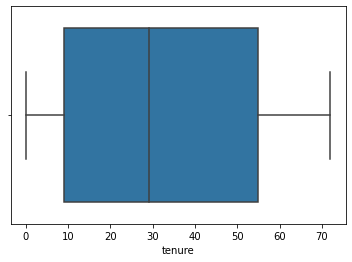

In [156]:
sns.boxplot(x='tenure',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

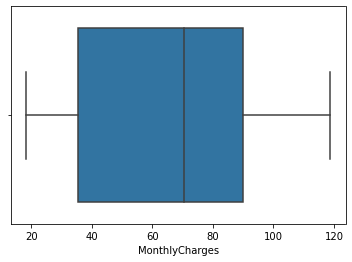

In [157]:
sns.boxplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='TotalCharges'>

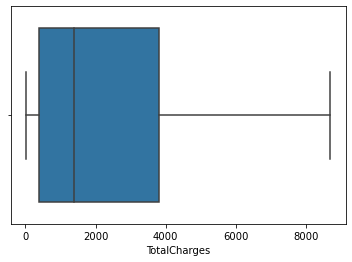

In [158]:
sns.boxplot(x='TotalCharges',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

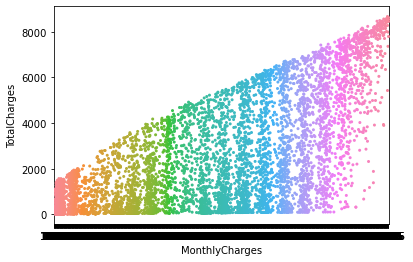

In [159]:
sns.stripplot(x="MonthlyCharges", y="TotalCharges", data=df, size=3, dodge=True)

<AxesSubplot:xlabel='tenure', ylabel='PhoneService'>

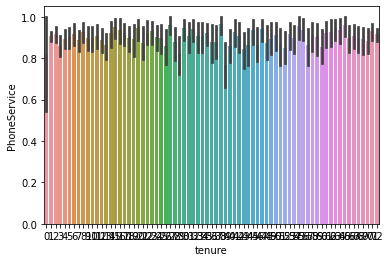

In [160]:
sns.barplot(x='tenure', y='PhoneService', data=df)

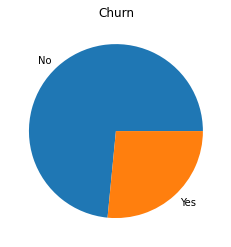

In [161]:
y = df.groupby('Churn').Churn.count()
mylabels = ["No", "Yes"]
plt.title("Churn")
plt.pie(y, labels = mylabels)
plt.show() 

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

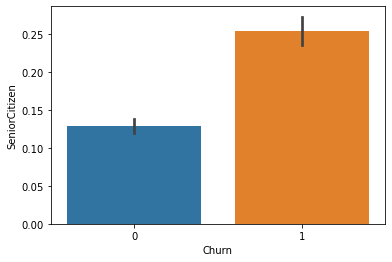

In [162]:
sns.barplot(data= df, x= "Churn", y= "SeniorCitizen")

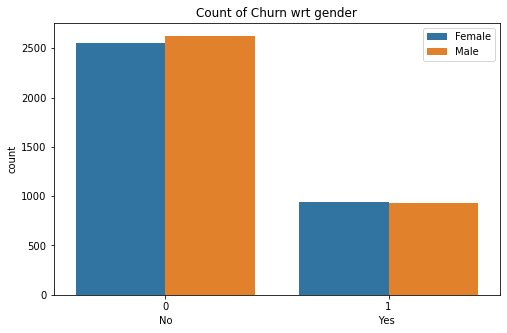

In [163]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', hue='gender',data=df)
plt.xlabel('No                                                                  Yes')
plt.title("Count of Churn wrt gender")
plt.legend(['Female','Male'])


In [203]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,2,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,2,0,53.85,108.15,1
3,1,0,0,0,45,0,0,2,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,0,2,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,2,0,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,0,0,0,74.40,306.60,1


### UnderSampling

<AxesSubplot:title={'center':'count (target)'}>

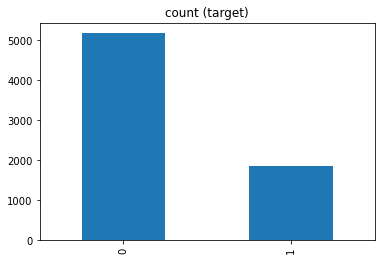

In [303]:
df['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [304]:
# class count
class_count_no, class_count_yes = df['Churn'].value_counts()

# seperate class
class_yes = df[df['Churn'] == 1]
class_no = df[df['Churn'] == 0]

print('class_yes: ', class_yes.shape)
print('class_no: ', class_no.shape)
class_count_yes

class_yes:  (1869, 13)
class_no:  (5174, 13)


1869

<AxesSubplot:title={'center':'count (target)'}>

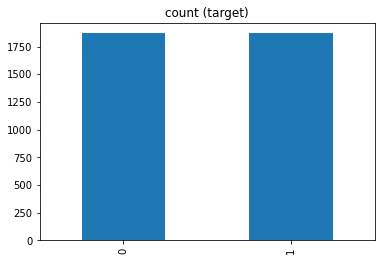

In [305]:
class_no_under = class_no.sample(class_count_yes)
data_sampled = pd.concat([class_no_under,class_yes], ignore_index = True, axis = 0)
data_sampled = data_sampled.sample(frac = 1)
data_sampled['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [306]:
data_sampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
358,0,1,0,0,64,1,0,0,2,0,74.65,4869.35,0
3338,0,1,1,0,26,1,1,0,2,0,84.95,2169.75,1
1255,0,1,1,1,11,1,1,0,0,0,78.10,864.85,0
223,1,1,1,0,35,1,1,0,0,0,100.80,3437.50,0
2340,0,0,0,0,23,1,1,0,2,0,79.15,1676.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0,0,1,1,48,1,1,2,2,1,103.25,5037.55,1
2347,1,0,0,0,24,1,1,0,0,0,96.00,2122.45,1
1974,1,1,0,0,3,1,1,0,2,0,81.35,233.70,1
2860,1,0,1,0,1,1,1,2,0,0,95.00,95.00,1


# Base line Model

### Dummy Classification
- DummyClassifier makes predictions that ignore the input features.
- This classifier serves as a simple baseline to compare against other more complex classifiers.

In [307]:
x_dummy = data_sampled['MonthlyCharges']
y_dummy = data_sampled['Churn']

In [308]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_dummy, y_dummy)

DummyClassifier(strategy='stratified')

In [309]:
dummy_clf.predict(x_dummy)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [310]:
dummy_clf.score(x_dummy, y_dummy)

0.5002675227394329

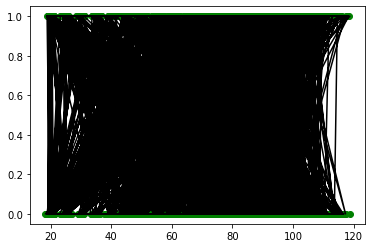

In [311]:
y_pred = dummy_clf.predict(x_dummy)
plt.scatter(x_dummy, y_dummy, color ='g')
plt.plot(x_dummy, y_pred, color ='k')

plt.show()

### Logistic Regression

In [312]:
from sklearn.model_selection import train_test_split

x_dummy = np.array(x_dummy).reshape(-1, 1)
y_dummy = np.array(y_dummy).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y_dummy, test_size=0.25, random_state=27)

In [313]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\Users\Jegadit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [314]:
predictions = logisticRegr.predict(x_test)

In [315]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.6106951871657754


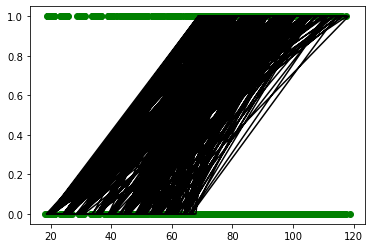

In [316]:
y_pred = logisticRegr.predict(x_test)
plt.scatter(x_train, y_train, color ='g')
plt.plot(x_test, y_pred, color ='k')

plt.show()

# Decision Tree

In [317]:
y_for_desctrees = data_sampled['Churn']
x_for_desctrees = data_sampled.drop(['Churn','MonthlyCharges','TotalCharges'], axis = 1)

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x_for_desctrees, y_for_desctrees, test_size=0.3, shuffle = True)

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6674049155226032, 0.9791666666666666, 'X[9] <= 0.5\nentropy = 1.0\nsamples = 2616\nvalue = [1319, 1297]'),
 Text(0.42361381061640374, 0.9375, 'X[7] <= 0.5\nentropy = 0.915\nsamples = 1708\nvalue = [564, 1144]'),
 Text(0.23084602232504045, 0.8958333333333334, 'X[4] <= 16.5\nentropy = 0.825\nsamples = 1257\nvalue = [325, 932]'),
 Text(0.11767341095266991, 0.8541666666666666, 'X[6] <= 0.5\nentropy = 0.685\nsamples = 807\nvalue = [147, 660]'),
 Text(0.06801173139158576, 0.8125, 'X[4] <= 5.5\nentropy = 0.88\nsamples = 254\nvalue = [76, 178]'),
 Text(0.04156553398058253, 0.7708333333333334, 'X[2] <= 0.5\nentropy = 0.788\nsamples = 178\nvalue = [42, 136]'),
 Text(0.02649676375404531, 0.7291666666666666, 'X[5] <= 0.5\nentropy = 0.821\nsamples = 156\nvalue = [40, 116]'),
 Text(0.009708737864077669, 0.6875, 'X[1] <= 0.5\nentropy = 0.634\nsamples = 50\nvalue = [8, 42]'),
 Text(0.008090614886731391, 0.6458333333333334, 'X[8] <= 1.0\nentropy = 0.764\nsamples = 36\nvalue = [8, 28]'),
 Text(0

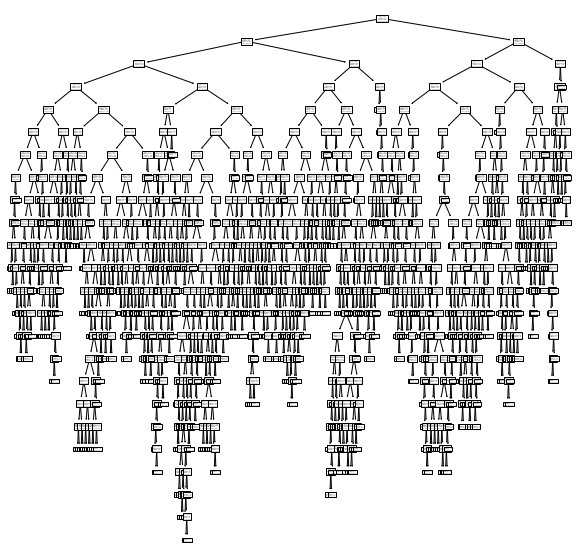

In [319]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,10)))
plot_tree(dtree)

In [320]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.696969696969697

In [321]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, predicitions)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       550
           1       0.70      0.71      0.70       572

    accuracy                           0.70      1122
   macro avg       0.70      0.70      0.70      1122
weighted avg       0.70      0.70      0.70      1122

